# Nikshay Jain - MM21B044
# FML: Assign 1

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
columns = ['x1','x2','y']
data = pd.read_csv('FMLA1Q1Data_train.csv', header = None)
data.columns = columns

In [4]:
X = data[['x1','x2']].values
X = np.c_[X, np.ones(X.shape[0])]       # to account for bias term
y = data['y'].values
m,n = X.shape

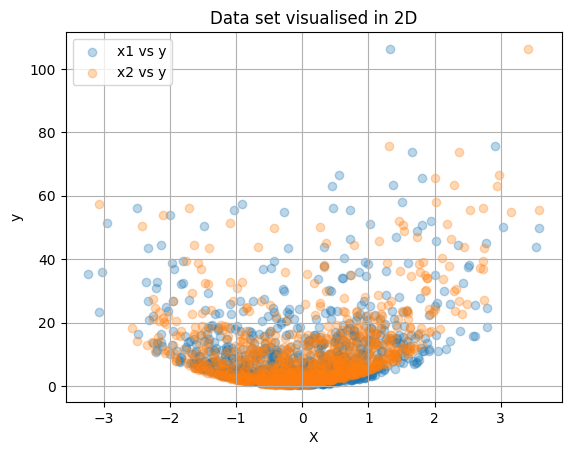

In [5]:
# Visualise the dataset
plt.scatter(data['x1'], y, alpha = 0.3, label = 'x1 vs y')
plt.scatter(data['x2'], y, alpha = 0.3, label = 'x2 vs y')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Data set visualised in 2D')
plt.grid()
plt.legend()
plt.show()

In [6]:
columns = ['x1','x2','y']
test = pd.read_csv('FMLA1Q1Data_test.csv', header = None)
test.columns = columns

In [7]:
X_test = test[['x1','x2']].values
X_test = np.c_[X_test, np.ones(X_test.shape[0])]       # to account for bias term
y_test = test['y'].values

## Part (i)

In [8]:
w_ml = np.linalg.inv(X.T @ X) @ X.T @ y     # last component of w is bias
print("w_MLE by analytical method:", w_ml)

w_MLE by analytical method: [1.76570568 3.5215898  9.89400832]


Note that the 3rd term in w_ml is the bias term

## Part (ii)

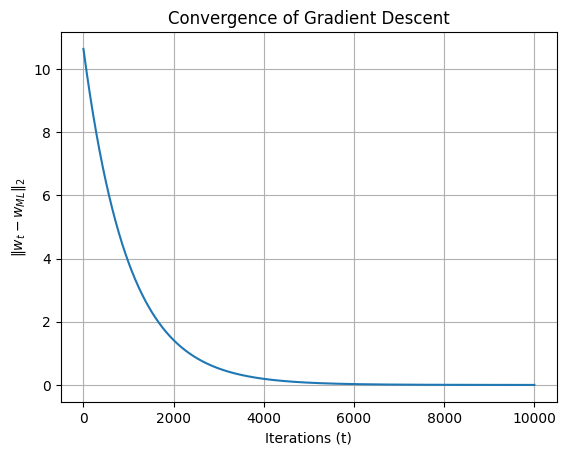

w by gradient descent algo: [1.76546732 3.52157758 9.89354075]


In [9]:
# Initialize weights for GD
w_t = np.zeros(X.shape[1])  # Start with zeros

# Parameters
lr = 1e-3
itr = 10000
t_values = np.arange(itr)
norm_diff = np.zeros(itr)

# Gradient Descent Algo
for t in range(itr):
    grad = (X.T @ (X @ w_t - y))/m          # considering the cost function as J(w)= 1/2 * ||X*w - y||_2 ^2
    w_t = w_t - lr * grad
    norm_diff[t] = np.linalg.norm(w_t - w_ml)       # L2 norm of the difference between w_t and w_ml

# Plot
plt.plot(t_values, norm_diff)
plt.xlabel('Iterations (t)')
plt.ylabel(r'$\|w_t - w_{ML}\|_2$')
plt.title(r'Convergence of Gradient Descent')
plt.grid(True)
plt.show()

print("w by gradient descent algo:", w_t)

Observations:

Initially, the norm decreases very rapidly, giving us rapid convergence. As the algorithm progresses, the decline in the norm slows down until the weights converge to the optimal value (the norm approaches zero).

The choice of learning rate (lr) has a large impact on convergence speed:
1. If it is too large, the method may fail to converge
2. if it is too little, convergence may be slow.

## Part (iii)

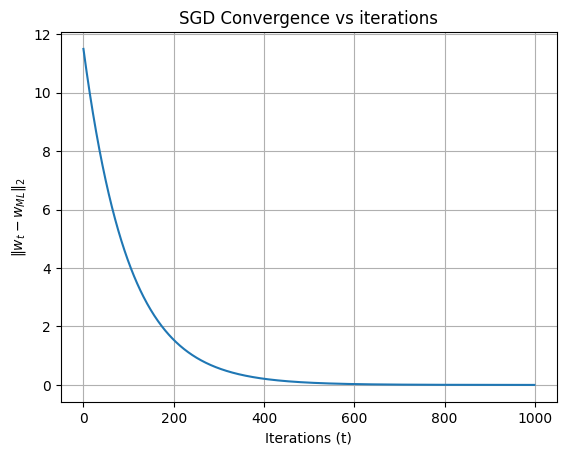

w by stochastic gradient descent algo: [1.76550418 3.52158385 9.89355694]


In [10]:
# Parameters
lr_st = 1e-3
batch_size = 100
itr = 1000

w_t = np.random.randn(n)       # Initialize weights to random nos.
diff = []                      # To store values of the diff norm of w's

# Stochastic GD algo
for t in range(itr):
    # Shuffle the data
    idx = np.random.permutation(m)
    X_sfl = X[idx]
    y_sfl = y[idx]
    
    # For each batch
    for i in range(0, itr, batch_size):
        X_b = X_sfl[i : i+batch_size]
        y_b = y_sfl[i : i+batch_size]
        
        grad = (X_b.T @ (X_b @ w_t - y_b))/batch_size      # considering the cost function as J(w)= 1/(2*batch) * \summ((X*w - y) ^2)
        w_t = w_t - lr * grad
    
    # Compute || w_t - w_ml ||^2 (Euclidean distance between current and true weights)
    diff.append(np.linalg.norm(w_t - w_ml))

# Plot || w_t - w_ml ||^2 as a function of iterations
plt.plot(range(itr), diff)
plt.xlabel('Iterations (t)')
plt.ylabel(r'$\|w_t - w_{ML}\|_2$')
plt.title(r'SGD Convergence vs iterations')
plt.grid(True)
plt.show()

print("w by stochastic gradient descent algo:", w_t)

Observations for Stochastic GD:
1. The plot shows that the error decreases over time, indicating that the weights gradually converge to the optimal weights (w_ml)
2. The no of iterations needed here is much lower than the previous one (with same learning rate) as this works on random sampling & averaging.
3. this algo is better in terms of time complexity.

## Part (iv)

Consider the cost function as $J = \frac{1}{2}||X^T w - y||_2^2 + \frac{1}{2}\lambda||w||_2^2$.

Which can be written as $J = \frac{1}{2m} \sum_{i=1}^{m} (wx_i - y_i) + \frac{\lambda}{2m} \sum_{j=1}^{n}{w^2}$.

Its gradient becomes $\nabla J = \frac{1}{m}(X^T(Xw - y) + \lambda w)$

As we had considered the overall regularisation parameter as $\lambda /2$, we will report half of the value of lambda we compute at the end as the final lambda

In [309]:
def ridge_gd(X_train, y_train, X_val, y_val, lambda_):
    # Initialize params
    w_t = np.zeros(n)
    lr = 1e-3
    itr = 10000
    errors = []

    # train the model
    for i in range(itr):
        grad = ((X_train.T @ (X_train @ w_t - y_train)) + (lambda_*w_t))/m
        w_t = w_t - lr * grad

    # cross validation
    pred = X_val @ w_t
    err = np.mean((pred - y_val)**2)
    errors.append(err)
    
    return [err, w_t]

Lambda optimum =  78


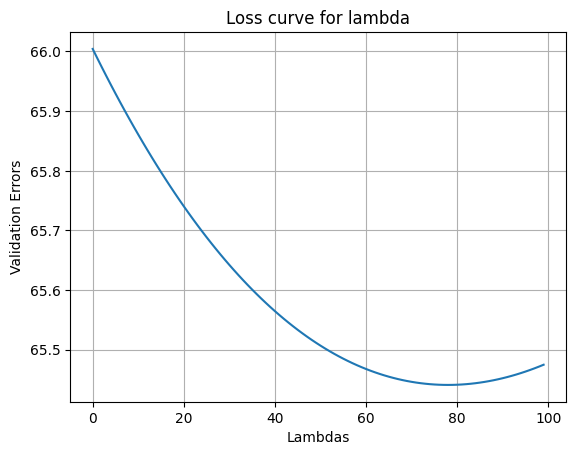

In [308]:
errors = []
lambdas = np.arange(0,100)
for l in lambdas:
    errors.append(ridge_gd(X, y, X_test, y_test, l)[0])

plt.plot(lambdas, errors)
plt.xlabel("Lambdas")
plt.ylabel("Validation Error")
plt.title(f"Validation MSE vs lambda curve")
plt.grid()
plt.show()

So the best regularisation parameter is lambdas[np.argmin(errors)]/2 = 39

In [317]:
lm_opt = lambdas[np.argmin(errors)]
w_r = ridge_gd(X, y, X_test, y_test, lm_opt)[1]

print("Lambda optimum =", lm_opt)
print("Weights by ridge regr =", w_r)

Lambda optimum = 78
Weights by ridge regr = [1.61374116 3.28916492 9.18127538]


In [328]:
mse_R = np.mean((X_test @ w_r - y_test) ** 2)
mse_ML = np.mean((X_test @ w_ml - y_test) ** 2)

print("Total MSE by MLE =", mse_ML)
print("Total MSE by Ridge =", mse_R)

Total MSE by MLE = 66.00545933461238
Total MSE by Ridge = 65.44104337942724


Ridge regression imposes a penalty for some weights, which helps us to reduce overfitting, particularly in cases of multicollinearity or a large number of features. Ridge Regression frequently might results in a minor increase in bias (due to regularization), but it can dramatically reduce variance, allowing for improved generalization of previously unseen data. OLS can reduce bias but may have large variance, particularly in complex models with noisy data. So we get lesser MSE in Ridge regression when compared to MLE.

## Part (v)

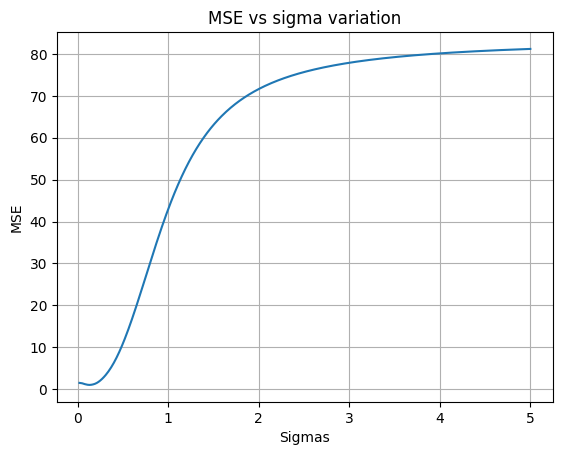

In [372]:
# Parameters for polynomial kernel
deg = 2
sig = np.arange(0.02,5,0.01)      # Do a linear search over the range of sigma to find the one that fits the best

# Kernel functions
def kernels(X, X_i, sig):
    poly = (np.dot(X, X_i) + 1)**deg
    gaus = np.exp(-np.sum((X - X_i)**deg, axis=1) / (2*sig**2))
    return [poly, gaus]

def kernel_regression_predict(X_train, y_train, X_test, sig):
    pred_poly, pred_gaus = np.zeros(X_test.shape[0]), np.zeros(X_test.shape[0])

    for i in range(X_test.shape[0]):
        K_poly, K_gaus = kernels(X_train, X_test[i], sig)

        pred_poly[i] = np.sum(K_poly * y_train) / np.sum(K_poly)
        pred_gaus[i] = np.sum(K_gaus * y_train) / np.sum(K_gaus)
    return [pred_poly,pred_gaus]

gaussian_mse = []
for i in sig:
    pred_gaus = kernel_regression_predict(X, y, X_test, i)[1]
    mse_gaus = np.mean((pred_gaus-y_test)**2)
    gaussian_mse.append(mse_gaus)

plt.plot(sig, gaussian_mse)
plt.xlabel("Sigmas")
plt.ylabel("MSE")
plt.title("MSE vs sigma variation")
plt.grid()
plt.show()

In [390]:
sig_opt = sig[np.argmin(gaussian_mse)]
pred_poly, pred_gaus = kernel_regression_predict(X, y, X_test, sig_opt)

mse_poly = np.mean((pred_poly - y_test)**2)
mse_gaus = np.mean((pred_gaus - y_test)**2)

print("Total MSE by Polynomial kernel =", mse_poly)
print("Total MSE by Gaussian kernel =", mse_gaus)

Total MSE by Polynomial kernel = 59.475665501673646
Total MSE by Gaussian kernel = 0.9987910678941685


Kernel Regression, especially gaussian kernel can model the data with high accuracy as it can capture the non linearities as well, which OLS misses out. On visualising the data, we find that it is certianly a non linear relationship which is governing it. Also, in the kernel regression the effect of outliers diminishes, making it more robust. Hence, the overall MSE of test data diminishes to a value lesser than ridge regression.

The gaussian kernel gives an abnormally low value in test data, which is due to the fact that it maps x to infintie dimention space and not just a quadratic space, as by the polynomial kernel. 